# ANZ Predictive Case Study (Forage)
https://www.theforage.com/virtual-internships/prototype/ZLJCsrpkHo9pZBJNY/ANZ-Virtual-Internship

Problem Statement: 
1. Find the correlation between Annual Salary and other factors such as age, balance and amount 
2. Train models for Predictive analytics

In [465]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
print('Environment Setup Complete')

Environment Setup Complete


## EDA

In [466]:
import pandas as pd
import numpy as np

df=pd.read_csv('ANZ synthesised transaction dataset.csv')
df.head()

,customer_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,...,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,bpay_biller_code,merchant_code,Unnamed: 23
0,CUS-2505971401,Abigail,1956.58,2018/8/3,F,40.0,NaN,NaN,2018-08-03T13:00:00.000+0000,1946.57,...,posted,NaN,ACC-2528867619,AUD,138.58 -34.96,PAY/SALARY,NaN,0,0.0,NaN
1,CUS-2505971401,Abigail,1913.92,2018/8/8,F,40.0,South Nowra,NSW,2018-08-08T04:38:14.000+0000,42.66,...,authorized,1.0,ACC-2528867619,AUD,138.58 -34.96,SALES-POS,ea247b5c-61ee-4106-988f-84c3036ce5e0,NaN,NaN,NaN
2,CUS-2505971401,Abigail,1895.24,2018/8/8,F,40.0,Yass,NSW,2018-08-08T08:49:24.000+0000,18.68,...,authorized,1.0,ACC-2528867619,AUD,138.58 -34.96,SALES-POS,8927cdaf-73bc-49c2-ad75-0ebfbe983053,NaN,NaN,NaN
3,CUS-2505971401,Abigail,1850.22,2018/8/8,F,40.0,Albany,WA,2018-08-08T17:29:40.000+0000,45.02,...,authorized,1.0,ACC-2528867619,AUD,138.58 -34.96,POS,d47efc0a-2443-47d0-ad6b-4379779d2e3e,NaN,NaN,NaN
4,CUS-2505971401,Abigail,1830.26,2018/8/8,F,40.0,Allenby Gardens,SA,2018-08-08T21:40:26.000+0000,19.96,...,authorized,1.0,ACC-2528867619,AUD,138.58 -34.96,POS,21960650-c56e-4411-bc06-56e9964daf8e,NaN,NaN,NaN


In [467]:
df.describe(include="all")

,customer_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,...,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,bpay_biller_code,merchant_code,Unnamed: 23
count,12043,12043,12043.000000,12043,12043,12043.000000,7717,7717,12043,12044.00000,...,12043,7717.000000,12043,12043,12043,12043,7717,885,883.0,4.000000
unique,100,80,NaN,91,2,NaN,1609,8,9442,NaN,...,2,NaN,100,1,100,6,5725,3,NaN,NaN
top,CUS-2487424745,Michael,NaN,2018/9/28,M,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,...,authorized,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,0,NaN,NaN
freq,578,746,NaN,174,6285,NaN,255,2169,10,NaN,...,7717,NaN,578,12043,578,3934,14,883,NaN,NaN
mean,NaN,NaN,14704.195553,NaN,NaN,30.582330,NaN,NaN,NaN,190.22331,...,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12216.912500
std,NaN,NaN,31503.722652,NaN,NaN,10.046343,NaN,NaN,NaN,643.65375,...,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11887.685364
min,NaN,NaN,0.240000,NaN,NaN,18.000000,NaN,NaN,NaN,0.10000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3260.720000
25%,NaN,NaN,3158.585000,NaN,NaN,22.000000,NaN,NaN,NaN,16.00000,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4803.950000
50%,NaN,NaN,6432.010000,NaN,NaN,28.000000,NaN,NaN,NaN,29.00000,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8115.300000
75%,NaN,NaN,12465.945000,NaN,NaN,38.000000,NaN,NaN,NaN,53.67250,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15528.262500


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12044 entries, 0 to 12043
Data columns (total 24 columns):
customer_id          12043 non-null object
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null object
gender               12043 non-null object
age                  12043 non-null float64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12044 non-null float64
transaction_id       12043 non-null object
country              12044 non-null object
merchant_long_lat    7717 non-null object
movement             12044 non-null object
status               12043 non-null object
card_present_flag    7717 non-null float64
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-n

In [469]:
df.count()

customer_id          12043
first_name           12043
balance              12043
date                 12043
gender               12043
age                  12043
merchant_suburb       7717
merchant_state        7717
extraction           12043
amount               12044
transaction_id       12043
country              12044
merchant_long_lat     7717
movement             12044
status               12043
card_present_flag     7717
account              12043
currency             12043
long_lat             12043
txn_description      12043
merchant_id           7717
bpay_biller_code       885
merchant_code          883
Unnamed: 23              4
dtype: int64

In [470]:
df.columns

Index(['customer_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'merchant_long_lat', 'movement', 'status',
       'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'bpay_biller_code', 'merchant_code',
       'Unnamed: 23'],
      dtype='object')

In [471]:
# Create Data table for narrowing down columns
data=df[["customer_id","age","gender","txn_description","balance","amount"]]
data.head()

,customer_id,age,gender,txn_description,balance,amount
0,CUS-2505971401,40.0,F,PAY/SALARY,1956.58,1946.57
1,CUS-2505971401,40.0,F,SALES-POS,1913.92,42.66
2,CUS-2505971401,40.0,F,SALES-POS,1895.24,18.68
3,CUS-2505971401,40.0,F,POS,1850.22,45.02
4,CUS-2505971401,40.0,F,POS,1830.26,19.96


In [472]:
#Check for nulls
data.isnull().any()

customer_id         True
age                 True
gender              True
txn_description     True
balance             True
amount             False
dtype: bool

In [473]:
# filling na
data= data.fillna(method='ffill')

In [474]:
# Discovering transcation description 
print(data['txn_description'].unique())

['PAY/SALARY' 'SALES-POS' 'POS' 'INTER BANK' 'PAYMENT' 'PHONE BANK']


In [475]:
# Counting Average balance and amount by each customer
plot_data= data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53.0,2275.852055,222.862603
1,CUS-1117979751,21.0,9829.929000,339.843700
2,CUS-1140341822,28.0,5699.212250,212.632500
3,CUS-1147642491,34.0,9032.841186,245.600169
4,CUS-1196156254,34.0,22272.433755,147.145796


In [476]:
# Counting Average amount of Pay/Salary in txn description for 3 month (2018/08-2018/10) 
# Rename amount column as salary
salary=data[data["txn_description"]=='PAY/SALARY'].groupby('customer_id').mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns={"amount":"salary"})
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


In [477]:
# Merge salary table and original plot_data table group by customer ID 
plot_data=pd.merge(plot_data, salary, on="customer_id")
plot_data.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53.0,2275.852055,222.862603,970.47
1,CUS-1117979751,21.0,9829.929000,339.843700,3578.65
2,CUS-1140341822,28.0,5699.212250,212.632500,1916.51
3,CUS-1147642491,34.0,9032.841186,245.600169,1711.39
4,CUS-1196156254,34.0,22272.433755,147.145796,3903.73


In [478]:
# Calculate Annual Salary by multuplying 12 months of the average 3 months salary per customer
plot_data['annual_salary'] = 12 * plot_data['salary']
plot_data

,customer_id,age,balance,amount,salary,annual_salary
0,CUS-1005756958,53.0,2275.852055,222.862603,970.47,11645.64
1,CUS-1117979751,21.0,9829.929000,339.843700,3578.65,42943.80
2,CUS-1140341822,28.0,5699.212250,212.632500,1916.51,22998.12
3,CUS-1147642491,34.0,9032.841186,245.600169,1711.39,20536.68
4,CUS-1196156254,34.0,22272.433755,147.145796,3903.73,46844.76
...,...,...,...,...,...,...
95,CUS-72755508,35.0,4497.557069,197.213276,725.32,8703.84
96,CUS-809013380,21.0,3756.902903,151.694274,1037.07,12444.84
97,CUS-860700529,30.0,3462.276009,77.681888,1808.62,21703.44
98,CUS-880898248,26.0,8528.830385,146.954487,1433.98,17207.76


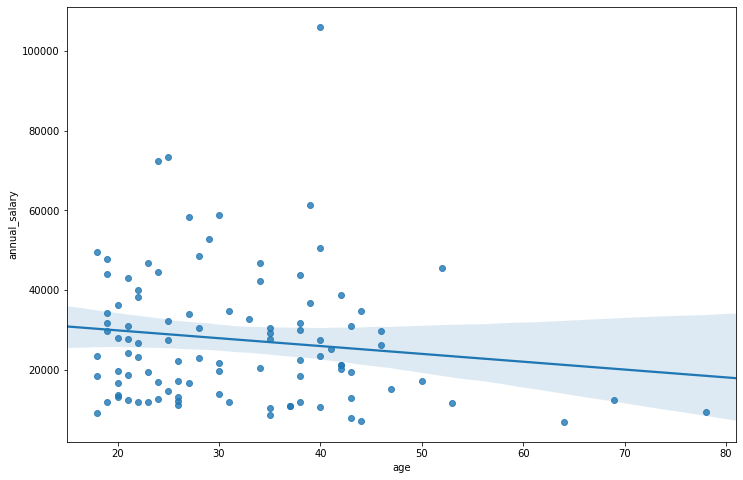

In [479]:
# plot correlation between age and annual salary
plt.figure(figsize=(12, 8))
sns.regplot("age", "annual_salary", data=plot_data) #salary&age

The regression plot shows a negative correlation between age and annual salary

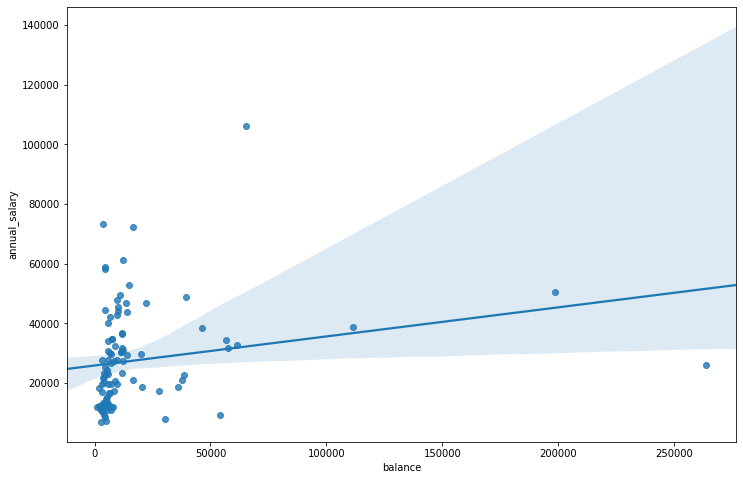

In [480]:
# plot correlation between balance and annual salary
plt.figure(figsize=(12,8))
sns.regplot('balance','annual_salary',fit_reg=True, data=plot_data) #salary&balance

The regression shows that there is a positive correlation between balance and annual salary.

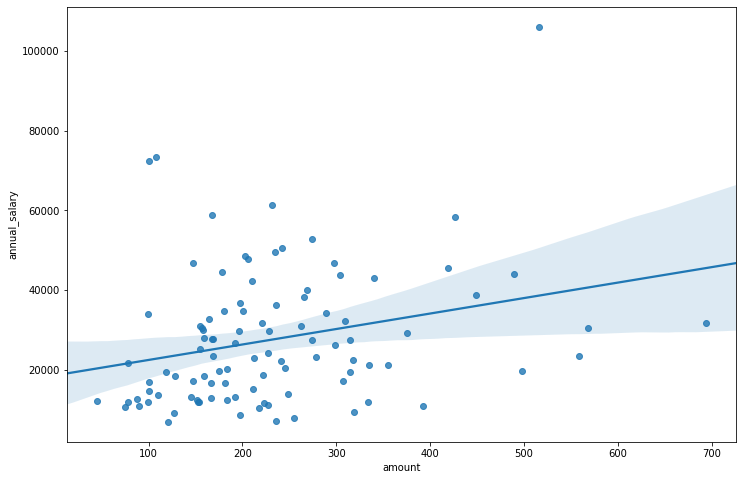

In [481]:
plt.figure(figsize=(12, 8))
sns.regplot("amount", "annual_salary", fit_reg=True, data=plot_data)

The regression shows that there is a positive correlation between amount and annual salary.

## Model Preparation and Building

### Training Data 

In [482]:
X = plot_data[['age', 'balance', 'amount']].values
y = plot_data['annual_salary'].values

# Splitting data into training data 70%, testing data 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Linear Regression

In [483]:
# Define model
lm = LinearRegression()

# Fit the model with training data
lm.fit(X_train, y_train)

lm.score(X, y) #Between 0-1

0.12506045997379744

In [484]:
# predict with test data
y_pred = lm.predict(X_test)

# Evaluating model performace
print(mean_squared_error(y_test, y_pred)) # mean squarred error 
print(r2_score(y_test, y_pred)) # r2 score In finance(0.4 < r2 weak  ; r >0.7 strong correlation)

395256613.85306144
0.038898145607129786


### Decision Tree

In [489]:
# Define model
dt = DecisionTreeRegressor(max_depth=5,random_state=1)

# fitting model
dt.fit(X_train, y_train)

dt.score(X, y)

0.2714823681383568

In [488]:
# Predict with test data
y_pred = dt.predict(X_test)

# Evaluating model performace
print(mean_squared_error(y_test, y_pred)) # mean squarred error
print(r2_score(y_test, y_pred)) # r2 score

610860732.9084064
-0.4853625786318003


## Conclusion
Based on the two models, we can conclude that with lower MSE and R squared, Linear Regression Model performs better than Decision Tree Model. However,I suggest there might be more sutible models that we can choose in the future, since the MSE of the regression model is still very high, and in Finance if r squared measure below 0.4 would show as a low correlation.